# Getting Tweets

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 KB 7.5 MB/s eta 0:00:00


In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np

In [ ]:
query = "eurusd (from:DailyFx, OR from:waltervannelli, OR from:PipCzar, OR from:Fxflow, OR from:forex, OR from:FXStreetNews) lang:en until:2022-11-09 since:2006-12-01 -filter:replies"
tweets = []
limits = 100000

In [ ]:
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  if len(tweets) == limits:
    break
  else:
    tweets.append([tweet.date, tweet.username, tweet.content])

In [ ]:
df1 = pd.DataFrame(tweets, columns =['Date', 'User', 'Tweet'])
#df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m-%d')
#df1.to_csv('Tweet.csv')
pd.set_option('display.max_colwidth', None)

print(df1)

                           Date          User  \
0     2022-11-08 23:07:26+00:00  FXStreetNews   
1     2022-11-08 20:50:32+00:00  FXStreetNews   
2     2022-11-08 19:09:17+00:00  FXStreetNews   
3     2022-11-08 16:00:46+00:00  FXStreetNews   
4     2022-11-08 15:57:27+00:00  FXStreetNews   
...                         ...           ...   
49851 2008-10-30 08:47:41+00:00         forex   
49852 2008-09-30 13:24:52+00:00         forex   
49853 2008-06-20 10:39:29+00:00         forex   
49854 2008-06-04 15:07:19+00:00         forex   
49855 2008-05-27 06:51:56+00:00         forex   

                                                                                                                                                                                                   Tweet  
0      EURUSD Price Analysis: Bulls take a breather on the way to 1.0150 – by @anilpanchal7\n\nhttps://t.co/R1HQG2hrlF\n\n #EURUSD #Technical Analysis #ChartPatterns #TrendFollowing #SupportResistance  
1    

In [ ]:
##counting tweets per day
# def tweets_per_day(df):
#     df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
#     return df[['Tweet']].groupby(df['Date'].dt.date)


In [ ]:
# tweets_per_day(df1)

In [ ]:
#Changing date format
from datetime import datetime
df1['Date'] = pd.to_datetime(df1["Date"].dt.strftime('%Y%m%d'))
df1

,Date,User,Tweet
0,2022-11-08,FXStreetNews,EURUSD Price Analysis: Bulls take a breather on the way to 1.0150 – by @anilpanchal7\n\nhttps://t.co/R1HQG2hrlF\n\n #EURUSD #Technical Analysis #ChartPatterns #TrendFollowing #SupportResistance
1,2022-11-08,FXStreetNews,EURUSD moves back into longs following sharp breakout – by @fx_ross\n\nhttps://t.co/3VdXgOxzRG\n\n #EURUSD #Technical Analysis #DollarIndex #US Elections
2,2022-11-08,FXStreetNews,Forex Today: Dollar bears broke the Matrix – by @ValBednarik\n\nhttps://t.co/Ci6THiR5bj\n\n #EURUSD #XAUUSD #YieldCurve #CryptoCurrencies #Equities
3,2022-11-08,FXStreetNews,"EUR/USD, jumps to session highs at 1.0550 as the US dollar dips https://t.co/ZxRv1tKjf1 #EURUSD #Currencies"
4,2022-11-08,FXStreetNews,EURUSD to trade choppily around 0.95 in the months ahead – Rabobank https://t.co/rsYjIxD6KG #EURUSD #Energy #Banks
...,...,...,...
49851,2008-10-30,forex,The last resistance on EURUSD @ 1.3300. The end of the consolidation ?
49852,2008-09-30,forex,EURUSD below 1.4300 =&gt; next step 1.3900
49853,2008-06-20,forex,Waiting for a move on USDCAD and didn't see the 1.5600 resistance break on EURUSD
49854,2008-06-04,forex,Time to short EURUSD? Euro is in a downtrend


In [ ]:
#Changing Tweet column to string type (TextBlob)
df1['Tweet'] = df1['Tweet'].astype("string")

# Cleaning tweets

In [ ]:
import re 

In [ ]:
def clean_tweet(tweet):
  if type (tweet) == float:
    return ""
  temp = tweet.lower()
  temp = re.sub("'", "", temp) #to avoid removing contractions in english
  temp = re.sub(r"(@[A-Za-z0-9_]+)|[^\w/\s]|#|http\S+","", temp)
  temp = re.sub('[()!?]', ' ', temp)
  temp = re.sub('\[.*?\]',' ', temp)
  temp = re.sub("[^a-z0-9]", " ", temp)
  return temp 

In [ ]:
clean_tweets = []
for tw in df1['Tweet']:
  results = clean_tweet(tw)
  clean_tweets.append(results)

df1['twee']= clean_tweets

df1.to_csv("Cleaned_Tweet.csv")

df1.head(10)

,Date,User,Tweet,twee
0,2022-11-08,FXStreetNews,EURUSD Price Analysis: Bulls take a breather on the way to 1.0150 – by @anilpanchal7 https://t.co/R1HQG2hrlF #EURUSD #Technical Analysis #ChartPatterns #TrendFollowing #SupportResistance,eurusd price analysis bulls take a breather on the way to 10150 by eurusd technical analysis chartpatterns trendfollowing supportresistance
1,2022-11-08,FXStreetNews,EURUSD moves back into longs following sharp breakout – by @fx_ross https://t.co/3VdXgOxzRG #EURUSD #Technical Analysis #DollarIndex #US Elections,eurusd moves back into longs following sharp breakout by eurusd technical analysis dollarindex us elections
2,2022-11-08,FXStreetNews,Forex Today: Dollar bears broke the Matrix – by @ValBednarik https://t.co/Ci6THiR5bj #EURUSD #XAUUSD #YieldCurve #CryptoCurrencies #Equities,forex today dollar bears broke the matrix by eurusd xauusd yieldcurve cryptocurrencies equities
3,2022-11-08,FXStreetNews,"EUR/USD, jumps to session highs at 1.0550 as the US dollar dips https://t.co/ZxRv1tKjf1 #EURUSD #Currencies",eur usd jumps to session highs at 10550 as the us dollar dips eurusd currencies
4,2022-11-08,FXStreetNews,EURUSD to trade choppily around 0.95 in the months ahead – Rabobank https://t.co/rsYjIxD6KG #EURUSD #Energy #Banks,eurusd to trade choppily around 095 in the months ahead rabobank eurusd energy banks
5,2022-11-08,FXStreetNews,EURUSD Price Analysis: Immediately to the upside comes the 100-day SMA – by @pabspiovano https://t.co/ZI51x0CHa5 #EURUSD #Technical Analysis #Currencies #Majors,eurusd price analysis immediately to the upside comes the 100day sma by eurusd technical analysis currencies majors
6,2022-11-08,FXStreetNews,EURUSD: Modest to resume above 1.0005/10 towards 1.0050 – Scotiabank https://t.co/MrpDVEPlIZ #EURUSD #Banks,eurusd modest to resume above 10005 10 towards 10050 scotiabank eurusd banks
7,2022-11-08,FXStreetNews,EURUSD to extend its bounce on a break past 1.01 – SocGen https://t.co/gLJOEBt2ew #EURUSD #Banks,eurusd to extend its bounce on a break past 101 socgen eurusd banks
8,2022-11-08,FXStreetNews,Eurozone Retail Sales drop 0.6% YoY in September vs. -1.3% expected https://t.co/dhIiqeCW16 #RetailSales #EURUSD #EconomicIndicator #Eurozone,eurozone retail sales drop 06 yoy in september vs 13 expected retailsales eurusd economicindicator eurozone
9,2022-11-08,FXStreetNews,EURUSD: Bears step in and drag the pair below parity – by @pabspiovano https://t.co/Fyy6gL50cI #EURUSD #Currencies #Majors,eurusd bears step in and drag the pair below parity by eurusd currencies majors


In [ ]:
data= pd.read_csv('Cleaned_Tweet.csv')
data.drop(data.columns[[0,2,3]], axis=1, inplace=True)

data.dropna()
#data = data.drop(labels=41450, axis=0) #delete data at row 41451

data.set_index('Date', inplace=True)
data

,twee
Date,
2022-11-08,eurusd price analysis bulls take a breather on the way to 10150 by eurusd technical analysis chartpatterns trendfollowing supportresistance
2022-11-08,eurusd moves back into longs following sharp breakout by eurusd technical analysis dollarindex us elections
2022-11-08,forex today dollar bears broke the matrix by eurusd xauusd yieldcurve cryptocurrencies equities
2022-11-08,eur usd jumps to session highs at 10550 as the us dollar dips eurusd currencies
2022-11-08,eurusd to trade choppily around 095 in the months ahead rabobank eurusd energy banks
...,...
2008-10-30,the last resistance on eurusd 13300 the end of the consolidation
2008-09-30,eurusd below 14300 gt next step 13900
2008-06-20,waiting for a move on usdcad and didnt see the 15600 resistance break on eurusd


In [ ]:
data= data.sort_values(by=['Date'])

In [ ]:
data

,twee
Date,
2008-05-27,ouch reverse on eurusd and gbpusd stop gt loss
2008-06-04,time to short eurusd euro is in a downtrend
2008-06-20,waiting for a move on usdcad and didnt see the 15600 resistance break on eurusd
2008-09-30,eurusd below 14300 gt next step 13900
2008-10-30,the last resistance on eurusd 13300 the end of the consolidation
...,...
2022-11-08,eurusd drops marginally but holds parity ahead of us midterm elections by eurusd retailsales us elections inflation fed
2022-11-08,eurusd price analysis further upside beyond parity hinges on 100dma breakout by eurusd technical analysis swingtrading chartpatterns supportresistance
2022-11-08,eurusd bears step in and drag the pair below parity by eurusd currencies majors


In [ ]:
data=data.dropna()

# IMPORT LIBRARIES 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# LOADING DATA

In [ ]:
from google.colab import files
files.upload()

Saving EUcentralbank_finBert.csv to EUcentralbank_finBert.csv
Saving EUinflation_finBert.csv to EUinflation_finBert.csv
Saving EUinterestrate_finBert.csv to EUinterestrate_finBert.csv
Saving EUrecession_finBert.csv to EUrecession_finBert.csv
Saving EUtax_finBert.csv to EUtax_finBert.csv
Saving macroeconomic_finBert.csv to macroeconomic_finBert.csv
Saving USFed_finBert.csv to USFed_finBert.csv
Saving USinflation_finBert.csv to USinflation_finBert.csv
Saving USinterestrate_finBert.csv to USinterestrate_finBert.csv
Saving USrecession2_finBert.csv to USrecession2_finBert.csv
Saving UStax_finBert.csv to UStax_finBert.csv


## TWITTER DATA

In [ ]:
tweet1 = pd.read_csv('EUcentralbank_finBert.csv')
tweet2 = pd.read_csv('EUinflation_finBert.csv')
tweet3 = pd.read_csv('EUinterestrate_finBert.csv')
tweet4 = pd.read_csv('EUrecession_finBert.csv')
tweet5 = pd.read_csv('EUtax_finBert.csv')
tweet6 = pd.read_csv('macroeconomic_finBert.csv')
tweet7 = pd.read_csv('USFed_finBert.csv')
tweet8 = pd.read_csv('USinflation_finBert.csv')
tweet9 = pd.read_csv('USinterestrate_finBert.csv')
tweet10 = pd.read_csv('USrecession2_finBert.csv')
tweet11 = pd.read_csv('UStax_finBert.csv')

In [ ]:
frames = [tweet1, tweet2, tweet3, tweet4, tweet5, tweet6, tweet7, tweet8, tweet9, tweet10, tweet11]
data=pd.concat(frames)

In [ ]:
# data=pd.read_csv('tweets.csv')

In [ ]:
#Changing Column "Twee" to string type
data.loc[:,'twee'] = data.loc[:, 'twee'].astype(str)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399855 entries, 0 to 30106
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       399855 non-null  object
 1   User       399855 non-null  object
 2   twee       399855 non-null  object
 3   sentiment  399855 non-null  object
dtypes: object(4)
memory usage: 15.3+ MB


In [ ]:
from textblob import TextBlob

In [ ]:
def getTextSubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

In [ ]:
def getTextPolarity(txt):
  return TextBlob(txt).sentiment.polarity

In [ ]:
data['Subjectivity']= data['twee'].apply(getTextSubjectivity)
data['Polarity']= data['twee'].apply(getTextPolarity)

In [ ]:
data

,Date,User,twee,sentiment,Subjectivity,Polarity
0,12/16/2013,Habus,eu central bank warns against the bitcoin comp...,neutral,0.250000,0.000000
1,12/20/2013,torvale1953,european central bank president mario draghi e...,neutral,0.263889,-0.097222
2,12/22/2013,fortunepayment,the european central bank ecb has created the ...,neutral,0.125000,0.000000
3,12/24/2013,nipped,small panic attack by the turkish central bank...,neutral,0.300000,-0.083333
4,12/27/2013,skydbelltreatti,details of eu iran sanctions covers oil compan...,neutral,0.250000,0.000000
...,...,...,...,...,...,...
30102,11/10/2022,thatwhatmatters,only when shri is coming to bengaluru shri ...,neutral,0.833333,0.083333
30103,11/10/2022,PhilipBritz3,psastrike the right to strike is a mature poli...,neutral,0.545238,-0.038095
30104,11/10/2022,grahamh941,bit of a long shot but does anyone have any ex...,neutral,0.450000,-0.118750
30105,11/10/2022,OsgoodeIFLS,does implementing canadadisabilitybenefit act ...,negative,1.000000,0.500000


In [ ]:
#data.to_csv('Tweet_textblob.csv')

In [ ]:
data1= data.sort_values(by=['Date'])
data1.drop_duplicates(subset='twee',inplace=True)

In [ ]:
data1 = data.drop(data[data['twee']==''].index)

In [ ]:
from datetime import datetime
data1['Date'] = pd.to_datetime(data1['Date'], errors='coerce')
data1['Date'] = data1['Date'].dt.strftime('%Y-%m-%d')

In [ ]:
data1.head()

,Date,User,twee,sentiment,Subjectivity,Polarity
0,2013-12-16,Habus,eu central bank warns against the bitcoin comp...,neutral,0.250000,0.000000
1,2013-12-20,torvale1953,european central bank president mario draghi e...,neutral,0.263889,-0.097222
2,2013-12-22,fortunepayment,the european central bank ecb has created the ...,neutral,0.125000,0.000000
3,2013-12-24,nipped,small panic attack by the turkish central bank...,neutral,0.300000,-0.083333
4,2013-12-27,skydbelltreatti,details of eu iran sanctions covers oil compan...,neutral,0.250000,0.000000


In [ ]:
def getTextAnalysis(a):
  if a<0:
    return 'Negative'
  elif a==0:
    return 'Neutral'
  else:
    return 'Positive'

In [ ]:
data1['Score']= data1['Polarity'].apply(getTextAnalysis)

In [ ]:
data1

,Date,User,twee,sentiment,Subjectivity,Polarity,Score
0,2013-12-16,Habus,eu central bank warns against the bitcoin comp...,neutral,0.250000,0.000000,Neutral
1,2013-12-20,torvale1953,european central bank president mario draghi e...,neutral,0.263889,-0.097222,Negative
2,2013-12-22,fortunepayment,the european central bank ecb has created the ...,neutral,0.125000,0.000000,Neutral
3,2013-12-24,nipped,small panic attack by the turkish central bank...,neutral,0.300000,-0.083333,Negative
4,2013-12-27,skydbelltreatti,details of eu iran sanctions covers oil compan...,neutral,0.250000,0.000000,Neutral
...,...,...,...,...,...,...,...
30102,2022-11-10,thatwhatmatters,only when shri is coming to bengaluru shri ...,neutral,0.833333,0.083333,Positive
30103,2022-11-10,PhilipBritz3,psastrike the right to strike is a mature poli...,neutral,0.545238,-0.038095,Negative
30104,2022-11-10,grahamh941,bit of a long shot but does anyone have any ex...,neutral,0.450000,-0.118750,Negative
30105,2022-11-10,OsgoodeIFLS,does implementing canadadisabilitybenefit act ...,negative,1.000000,0.500000,Positive


In [ ]:
# Drop duplicated tweets
data1.drop_duplicates(subset='twee',inplace=True)

In [ ]:
data1.shape

(356396, 7)

### Plotting

In [ ]:
positive = data1[data1['Score']=='Positive']
print(str(positive.shape[0]/(data1.shape[0])*100) + ' % of positive tweets')
pos=positive.shape[0]/data1.shape[0]*100

47.59340733341564 % of positive tweets


In [ ]:
negative = data1[data1['Score']=='Negative']
print(str(negative.shape[0]/(data1.shape[0])*100) + ' % of negative tweets')
neg=negative.shape[0]/data1.shape[0]*100

27.063715642150864 % of negative tweets


In [ ]:
neutral = data1[data1['Score']=='Neutral']
print(str(neutral.shape[0]/(data1.shape[0])*100) + ' % of neutral tweets')
neu=neutral.shape[0]/data1.shape[0]*100

25.3428770244335 % of neutral tweets


In [ ]:
explode= (0,0.1,0)
labels  = 'Positive', 'Negative', 'Neutral'
sizes=[pos, neg, neu]
colors = ['green', 'red', 'grey']

In [ ]:
import matplotlib.pyplot as plt

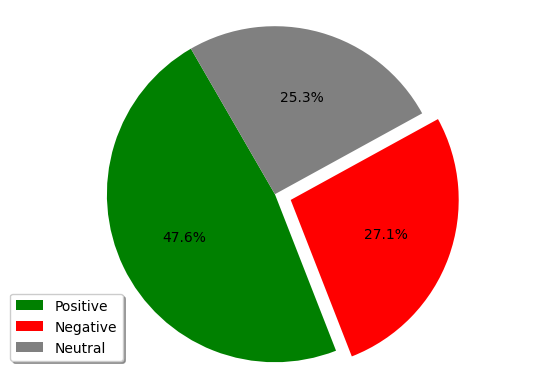

In [ ]:
plt.pie(sizes, explode = explode, colors = colors, autopct= '%1.1f%%', startangle = 120)
plt.legend(labels, loc = (-0.05, 0.05), shadow = True)
plt.axis('equal')
plt.savefig('Sentiment_Analysis.png')

In [ ]:
positivefb = data1[data1['sentiment']=='positive']
print(str(positivefb.shape[0]/(data1.shape[0])*100) + ' % of positivefb tweets')
posfb=positivefb.shape[0]/data1.shape[0]*100

12.943747965745969 % of positivefb tweets


In [ ]:
negativefb = data1[data1['sentiment']=='negative']
print(str(negativefb.shape[0]/(data1.shape[0])*100) + ' % of negativefb tweets')
negfb=negativefb.shape[0]/data1.shape[0]*100

24.206500634126087 % of negativefb tweets


In [ ]:
neutralfb = data1[data1['sentiment']=='neutral']
print(str(neutralfb.shape[0]/(data1.shape[0])*100) + ' % of neutralfb tweets')
neufb=neutralfb.shape[0]/data1.shape[0]*100

62.84975140012795 % of neutralfb tweets


In [ ]:
explodefb= (0,0.1,0)
labelsfb  = 'Positive', 'Negative', 'Neutral'
sizesfb=[posfb, negfb, neufb]
colorsfb = ['green', 'red', 'grey']

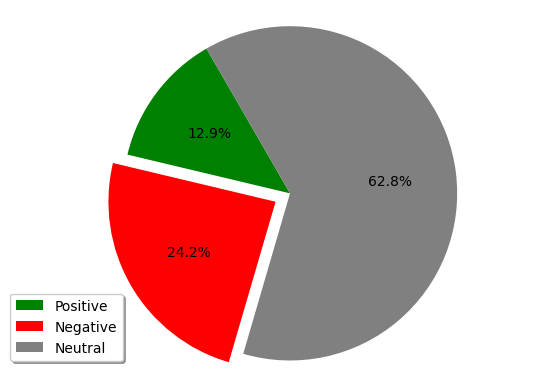

In [ ]:
plt.pie(sizesfb, explode = explodefb, colors = colorsfb, autopct= '%1.1f%%', startangle = 120)
plt.legend(labelsfb, loc = (-0.05, 0.05), shadow = True)
plt.axis('equal')
plt.savefig('Sentiment_Analysis FinBert.png')

### Adding week days

In [ ]:
# Get the day of week column
data1['weekday']= pd.to_datetime(data1['Date']).dt.day_name(locale='en_US.utf8')

In [ ]:
import datetime
DD = datetime.timedelta(days=1)
#filter for saturdays and Sunday date -1, -2 to become friday
#Saturdays
saturday = data1['weekday'] == "Saturday"
data1.loc[saturday,"Date"] = pd.to_datetime(data1.loc[saturday,"Date"]).dt.date - DD

In [ ]:
#Sundays
DD = datetime.timedelta(days=2)

sunday = data1['weekday'] == "Sunday"
data1.loc[sunday,"Date"] = pd.to_datetime(data1.loc[sunday,"Date"]).dt.date - DD

In [ ]:
data1

,Date,User,twee,sentiment,Subjectivity,Polarity,Score,weekday
0,2013-12-16,Habus,eu central bank warns against the bitcoin comp...,neutral,0.250000,0.000000,Neutral,Monday
1,2013-12-20,torvale1953,european central bank president mario draghi e...,neutral,0.263889,-0.097222,Negative,Friday
2,2013-12-20,fortunepayment,the european central bank ecb has created the ...,neutral,0.125000,0.000000,Neutral,Sunday
3,2013-12-24,nipped,small panic attack by the turkish central bank...,neutral,0.300000,-0.083333,Negative,Tuesday
4,2013-12-27,skydbelltreatti,details of eu iran sanctions covers oil compan...,neutral,0.250000,0.000000,Neutral,Friday
...,...,...,...,...,...,...,...,...
30102,2022-11-10,thatwhatmatters,only when shri is coming to bengaluru shri ...,neutral,0.833333,0.083333,Positive,Thursday
30103,2022-11-10,PhilipBritz3,psastrike the right to strike is a mature poli...,neutral,0.545238,-0.038095,Negative,Thursday
30104,2022-11-10,grahamh941,bit of a long shot but does anyone have any ex...,neutral,0.450000,-0.118750,Negative,Thursday
30105,2022-11-10,OsgoodeIFLS,does implementing canadadisabilitybenefit act ...,negative,1.000000,0.500000,Positive,Thursday


In [ ]:
data1.drop(['User','twee', 'sentiment','Score'],axis=1, inplace=True)

In [ ]:
data1['Date']=pd.to_datetime(data1['Date'])

In [ ]:
data1=data1.groupby('Date').mean()

<ipython-input-45-cdf9f88ed671>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1=data1.groupby('Date').mean()


In [ ]:
data1

,Subjectivity,Polarity
Date,,
2013-12-16,0.286844,0.041451
2013-12-17,0.319704,0.095234
2013-12-18,0.284293,0.055376
2013-12-19,0.238004,0.041377
2013-12-20,0.273545,0.040769
...,...,...
2022-11-04,0.396195,0.050284
2022-11-07,0.400084,0.060969
2022-11-08,0.412699,0.055271


In [ ]:
data1 = data1.sort_index().reset_index(drop=False) #reset to have an auto index

In [ ]:
data1.rename(columns = {'Date':'DateRelease'}, inplace = True)

# Getting EURUSD Price

In [ ]:
dt = yf.download(tickers ='EURUSD=X', start='2013-12-13', end='2022-11-11')
dt.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-13,1.375081,1.376842,1.371084,1.375081,1.375081,0
2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,0
2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,0
2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,0
2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,0


In [ ]:
dt.drop(['Volume'], axis=1, inplace=True)

In [ ]:
dt['returns'] = (dt['Adj Close']/dt['Adj Close'].shift(1)) -1
dt['returnsclass'] = [1 if dt.returns[i]>0 else 0 for i in range(len(dt))]

In [ ]:
dt

,Open,High,Low,Close,Adj Close,returns,returnsclass
Date,,,,,,,
2013-12-13,1.375081,1.376842,1.371084,1.375081,1.375081,NaN,0
2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,-0.000838,0
2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,0.001720,1
2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,0.000606,1
2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,-0.006268,0
...,...,...,...,...,...,...,...
2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,-0.006600,0
2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,0.018378,1
2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,0.009047,1


In [ ]:
dt=dt.dropna()

In [ ]:
dt.index = pd.to_datetime(dt.index)
data1.index = pd.to_datetime(data1.index) #convert index to datetime format

In [ ]:
#Joining 2 dataframes on index
df=pd.merge(left=data1, left_on='DateRelease',
         right=dt, right_on='Date')

In [ ]:
df

,DateRelease,Subjectivity,Polarity,Open,High,Low,Close,Adj Close,returns,returnsclass
0,2013-12-16,0.286844,0.041451,1.373815,1.379900,1.373815,1.373928,1.373928,-0.000838,0
1,2013-12-17,0.319704,0.095234,1.376178,1.378210,1.372701,1.376292,1.376292,0.001720,1
2,2013-12-18,0.284293,0.055376,1.377107,1.378099,1.373479,1.377126,1.377126,0.000606,1
3,2013-12-19,0.238004,0.041377,1.368307,1.369394,1.365113,1.368495,1.368495,-0.006268,0
4,2013-12-20,0.273545,0.040769,1.365598,1.370870,1.362583,1.365579,1.365579,-0.002130,0
...,...,...,...,...,...,...,...,...,...,...
2316,2022-11-04,0.396195,0.050284,0.974963,0.993818,0.974849,0.974963,0.974963,-0.006600,0
2317,2022-11-07,0.400084,0.060969,0.992881,1.000500,0.991945,0.992881,0.992881,0.018378,1
2318,2022-11-08,0.412699,0.055271,1.001863,1.009418,0.997606,1.001863,1.001863,0.009047,1
2319,2022-11-09,0.424420,0.034548,1.008085,1.008878,1.001252,1.008085,1.008085,0.006210,1


In [ ]:
df.drop(['returns'], axis=1, inplace=True)

In [ ]:
df2=df.set_index(['DateRelease'])

# STACKED LSTM

## DATA PROCESSING

In [ ]:
# Separate the features (historical prices and technical indicators) and the target (movement)
features = df2.iloc[:, :-1]
target = df2['returnsclass'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

In [ ]:
print(scaled_features.shape)
print(scaled_target.shape)

(2321, 7)
(2321, 1)


In [ ]:
# Reshape the input data for LSTM (samples, time steps, features)
lookback = 14  # Number of previous time steps to consider
num_features = 7
num_samples = scaled_features.shape[0]

In [ ]:
num_sequences = num_samples - lookback + 1
num_sequences

2308

In [ ]:
X = np.zeros((num_sequences, lookback, num_features))

for i in range(num_sequences):
    X[i] = scaled_features[i : i + lookback]
print(X.shape)

(2308, 14, 7)


In [ ]:
y = scaled_target[lookback-1:lookback-1+num_sequences]
y = np.reshape(y, (y.shape[0], 1))
print(y.shape)

(2308, 1)


In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print (X_train.shape)
print (y_train.shape)

(1846, 14, 7)
(1846, 1)


## MODEL

In [ ]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(lookback, X_train.shape[2])))
# model.add(Dropout(0.2))
# model_SA.add(LSTM(units=50, return_sequences=True))
# model_SA.add(Dropout(0.2))
model.add(LSTM(units=25))
# model_SA.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 100)           43200     
                                                                 
 lstm_1 (LSTM)               (None, 25)                12600     
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 55,826
Trainable params: 55,826
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history= model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split = 0.2 )

Epoch 1/40
47/47 [==============================] - 12s 47ms/step - loss: 0.6967 - accuracy: 0.5054 - val_loss: 0.6913 - val_accuracy: 0.5270
Epoch 2/40
47/47 [==============================] - 1s 26ms/step - loss: 0.6935 - accuracy: 0.5034 - val_loss: 0.6954 - val_accuracy: 0.4784
Epoch 3/40
47/47 [==============================] - 1s 26ms/step - loss: 0.6949 - accuracy: 0.5061 - val_loss: 0.6922 - val_accuracy: 0.5216
Epoch 4/40
47/47 [==============================] - 2s 36ms/step - loss: 0.6943 - accuracy: 0.5020 - val_loss: 0.6919 - val_accuracy: 0.5216
Epoch 5/40
47/47 [==============================] - 2s 36ms/step - loss: 0.6932 - accuracy: 0.5068 - val_loss: 0.6919 - val_accuracy: 0.5378
Epoch 6/40
47/47 [==============================] - 1s 27ms/step - loss: 0.6934 - accuracy: 0.5142 - val_loss: 0.6917 - val_accuracy: 0.5243
Epoch 7/40
47/47 [==============================] - 1s 26ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6914 - val_accuracy: 0.5216
Epoch 8/40
4

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

15/15 [==============================] - 0s 10ms/step - loss: 0.3616 - accuracy: 0.8225
Test Loss: 0.36159467697143555
Test Accuracy: 0.822510838508606


In [ ]:
predictions = model.predict(X_test)

15/15 [==============================] - 1s 7ms/step


In [ ]:
threshold = 0.5  # Threshold to convert probabilities to binary labels

incorrect_predictions = []

# Convert predicted probabilities to binary labels
binary_predictions = np.where(predictions > threshold, 1, 0)

for true_label, predicted_label in zip(y_test, binary_predictions):
    if true_label != predicted_label:
        incorrect_predictions.append((true_label, predicted_label))

incorrect_predictions_count = len(incorrect_predictions)
print(f"Number of Incorrect Predictions: {incorrect_predictions_count}")

Number of Incorrect Predictions: 82


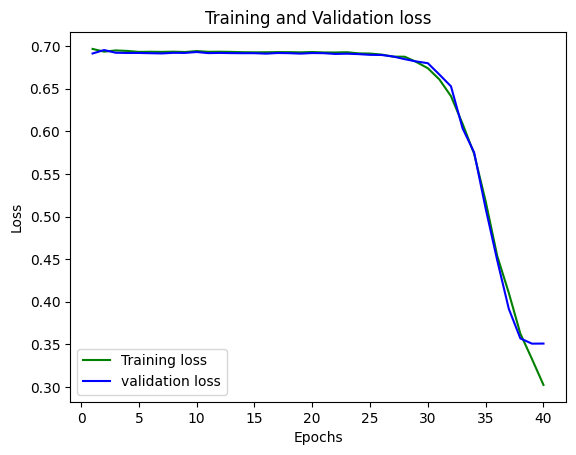

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,41)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

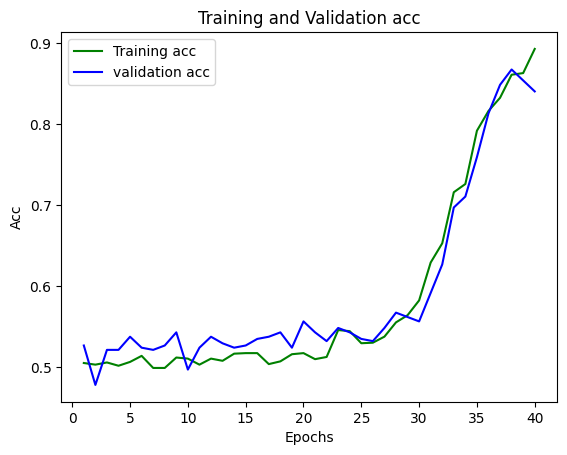

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,41)
plt.plot(epochs, acc_train, 'g', label='Training acc')
plt.plot(epochs, acc_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert predicted probabilities to binary labels
binary_predictions = np.where(predictions > threshold, 1, 0)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, binary_predictions, digits=4))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, binary_predictions))

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9518    0.6810    0.7940       232
         1.0     0.7500    0.9652    0.8441       230

    accuracy                         0.8225       462
   macro avg     0.8509    0.8231    0.8190       462
weighted avg     0.8513    0.8225    0.8189       462

Confusion Matrix:
[[158  74]
 [  8 222]]


In [ ]:
# Prepare the input data for prediction (assuming X_test represents the most recent data available)
input_data = scaled_features[-lookback:]  # Select the most recent lookback period as input data

# Reshape the input data
input_data = np.reshape(input_data, (1, lookback, num_features))  # Adjust the shape based on your specific lookback and feature dimensions

# Make the prediction
prediction = model.predict(input_data)

# Interpret the prediction
if prediction > 0.5:
    price_movement = "Positive"
else:
    price_movement = "Negative"

# Print the predicted price movement
print("Next day's price movement:", price_movement)

1/1 [==============================] - 0s 23ms/step
Next day's price movement: Positive


# SINGLE LSTM

## Data Preprocessing LSTM

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(df2)
print(data_set_scaled)
print(data_set_scaled[0].size)

[[0.38340208 0.58195459 0.95575293 ... 0.95580024 0.95580024 0.        ]
 [0.47608901 0.72540569 0.96120628 ... 0.96125319 0.96125319 1.        ]
 [0.37620764 0.61909539 0.96334911 ... 0.96317718 0.96317718 1.        ]
 ...
 [0.7383921  0.6188162  0.09747834 ... 0.09745652 0.09745652 1.        ]
 [0.77145418 0.56354413 0.11183391 ... 0.11180888 0.11180888 1.        ]
 [0.6021477  0.60194341 0.09768685 ... 0.09766498 0.09766498 0.        ]]
8


In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 14
print(data_set_scaled.shape[0])
for j in range(7):#data_set_scaled[0].size):# last column are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

2321


In [ ]:
#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

In [ ]:
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

print(X)
print(X.shape)
print(y)
print(y.shape)

[[[0.38340208 0.58195459 0.95575293 ... 0.96010293 0.95580024 0.95580024]
  [0.47608901 0.72540569 0.96120628 ... 0.95755404 0.96125319 0.96125319]
  [0.37620764 0.61909539 0.96334911 ... 0.95933491 0.96317718 0.96317718]
  ...
  [0.72044665 0.63812572 0.97181727 ... 0.96537358 0.97212747 0.97212747]
  [0.66227951 0.54656106 0.9573214  ... 0.96144159 0.9571071  0.9571071 ]
  [0.50655549 0.5550451  0.96216794 ... 0.93598753 0.96212745 0.96212745]]

 [[0.47608901 0.72540569 0.96120628 ... 0.95755404 0.96125319 0.96125319]
  [0.37620764 0.61909539 0.96334911 ... 0.95933491 0.96317718 0.96317718]
  [0.24564348 0.58175883 0.94304367 ... 0.94020116 0.94326461 0.94326461]
  ...
  [0.66227951 0.54656106 0.9573214  ... 0.96144159 0.9571071  0.9571071 ]
  [0.50655549 0.5550451  0.96216794 ... 0.93598753 0.96212745 0.96212745]
  [0.45093754 0.67645309 0.93916045 ... 0.92889675 0.93903629 0.93903629]]

 [[0.37620764 0.61909539 0.96334911 ... 0.95933491 0.96317718 0.96317718]
  [0.24564348 0.581758

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1845
(1845, 14, 7)
(462, 14, 7)
(1845, 1)
(462, 1)
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

## LSTM MODEL

In [ ]:
#tf.random.set_seed(20)
np.random.seed(50)

lstm_input = Input(shape=(backcandles, 7), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('sigmoid', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=40, shuffle=True, validation_split = 0.15)

Epoch 1/40
49/49 [==============================] - 3s 36ms/step - loss: 0.2520 - accuracy: 0.5070 - val_loss: 0.2511 - val_accuracy: 0.4693
Epoch 2/40
49/49 [==============================] - 1s 27ms/step - loss: 0.2501 - accuracy: 0.5179 - val_loss: 0.2509 - val_accuracy: 0.4693
Epoch 3/40
49/49 [==============================] - 1s 26ms/step - loss: 0.2503 - accuracy: 0.5147 - val_loss: 0.2497 - val_accuracy: 0.5307
Epoch 4/40
49/49 [==============================] - 2s 40ms/step - loss: 0.2506 - accuracy: 0.4955 - val_loss: 0.2502 - val_accuracy: 0.5018
Epoch 5/40
49/49 [==============================] - 2s 31ms/step - loss: 0.2501 - accuracy: 0.5108 - val_loss: 0.2511 - val_accuracy: 0.4693
Epoch 6/40
49/49 [==============================] - 2s 31ms/step - loss: 0.2501 - accuracy: 0.5204 - val_loss: 0.2500 - val_accuracy: 0.4982
Epoch 7/40
49/49 [==============================] - 1s 25ms/step - loss: 0.2499 - accuracy: 0.5070 - val_loss: 0.2512 - val_accuracy: 0.4693
Epoch 8/40
49

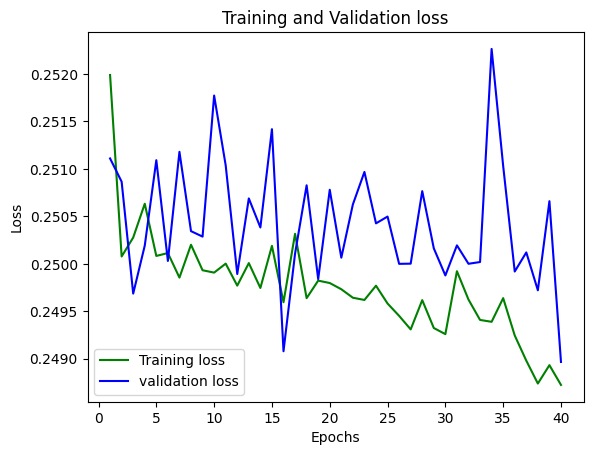

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,41)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred=np.where(y_pred > 0.50, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

15/15 [==============================] - 1s 15ms/step
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [1.]
[1] [1.]
[1] [1.]
[1] [1.]
[1] [0.]
[0] [1.]


In [ ]:
print(classification_report(y_test, y_pred, digits=4))
print(confusion_matrix(y_test, y_pred))

MNB_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, y_pred)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

         0.0     0.5309    0.1755    0.2638       245
         1.0     0.4698    0.8249    0.5987       217

    accuracy                         0.4805       462
   macro avg     0.5003    0.5002    0.4312       462
weighted avg     0.5022    0.4805    0.4211       462

[[ 43 202]
 [ 38 179]]
Accuracy :  48.05  %
f1_score :  0.421
